In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split

# Modelling
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Binning
import woeBinningPandas

# Create Unique ID
import uuid

<IPython.core.display.Javascript object>

Data: https://www.kaggle.com/wordsforthewise/lending-club

In [3]:
# Read data
accepted = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)
rejected = pd.read_csv("rejected_2007_to_2018Q4.csv", low_memory=False)

<IPython.core.display.Javascript object>

In [4]:
print(accepted.shape)
print(rejected.shape)

(2260701, 151)
(27648741, 9)


<IPython.core.display.Javascript object>

## KGB Model

In [5]:
# Sample 100k obs. for easy processing
accepted_small = accepted.sample(n=25000, random_state=7)
accepted_small.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [6]:
# Create Default Flag
accepted_small["target"] = accepted_small["loan_status"].apply(
    lambda x: 1 if x == "Charged Off" else (0 if x == "Fully Paid" else 2)
)

<IPython.core.display.Javascript object>

In [7]:
# Remove Current and Missings
accepted_small = accepted_small.loc[accepted_small["target"] != 2]
accepted_small.shape

(14838, 152)

<IPython.core.display.Javascript object>

In [8]:
pd.crosstab(accepted_small["target"], accepted_small["loan_status"])

loan_status,Charged Off,Fully Paid
target,,
0,0,11809
1,3029,0


<IPython.core.display.Javascript object>

The dataset is imbalanced

In [9]:
# Keep only 2 explanatory variables for quick an dirty PD model
df = accepted_small[["id", "target", "loan_amnt", "addr_state"]]

<IPython.core.display.Javascript object>

In [10]:
# Q&D Bucketing

# Loan Amount
df["loan_amnt2"] = df["loan_amnt"].apply(
    lambda x: "<=1k"
    if (x <= 1000)
    else ("1-10k" if (x > 1000 and x <= 10000) else ">10k")
)

<IPython.core.display.Javascript object>

In [11]:
# State
binning = woeBinningPandas.woe_binning(
    df, "target", "addr_state", 0.1, 0.1, 50, 100, "bad"
)
binning

,Group_2,Group_1,woe,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
37,misc. level neg.,PA,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
34,misc. level neg.,OH,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
26,misc. level neg.,NC,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
19,misc. level neg.,MD,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
30,misc. level neg.,NJ,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
14,misc. level neg.,IN,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
23,misc. level neg.,MO,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
32,misc. level neg.,NV,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
1,misc. level neg.,AL,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
41,misc. level neg.,TN,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179


<IPython.core.display.Javascript object>

In [12]:
badstates = binning["Group_1"][:25].tolist()
california = ["CA"]
goodstates = binning["Group_1"][27:].tolist()

<IPython.core.display.Javascript object>

In [13]:
df["addr_state2"] = df["addr_state"].apply(
    lambda x: "California"
    if (x == "CA")
    else ("Bad state" if (x in badstates) else "Good state")
)

<IPython.core.display.Javascript object>

In [14]:
df2 = df[["id", "target", "loan_amnt2", "addr_state2"]]

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Accepts')

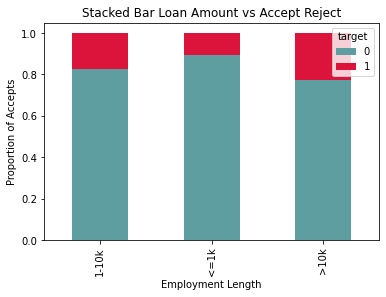

<IPython.core.display.Javascript object>

In [15]:
# Explore differentiation
%matplotlib inline
table = pd.crosstab(df2["loan_amnt2"], df2["target"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Loan Amount vs Accept Reject")
plt.xlabel("Employment Length")
plt.ylabel("Proportion of Accepts")

In [16]:
pd.crosstab(df2["loan_amnt2"], df2["target"]).apply(lambda r: r / r.sum(), axis=1)

target,0,1
loan_amnt2,,
1-10k,0.823922,0.176078
<=1k,0.892308,0.107692
>10k,0.775151,0.224849


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Accepts')

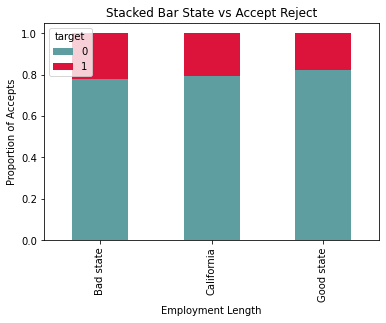

<IPython.core.display.Javascript object>

In [17]:
# Explore differentiation
%matplotlib inline
table = pd.crosstab(df2["addr_state2"], df2["target"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar State vs Accept Reject")
plt.xlabel("Employment Length")
plt.ylabel("Proportion of Accepts")

In [18]:
pd.crosstab(df2["addr_state2"], df2["target"]).apply(lambda r: r / r.sum(), axis=1)

target,0,1
addr_state2,,
Bad state,0.779883,0.220117
California,0.793533,0.206467
Good state,0.823040,0.176960


<IPython.core.display.Javascript object>

In [19]:
# One hot encoding
modelling_variables = ["target", "loan_amnt2", "addr_state2"]

for i in modelling_variables:
    if i != "target":
        df2 = df2.join(pd.get_dummies(df2[i]))
        df2 = df2.drop([i], axis=1)

<IPython.core.display.Javascript object>

In [20]:
# Drop Null Band
df3 = df2.drop(columns=["1-10k", "California"])

<IPython.core.display.Javascript object>

In [21]:
X = df3.loc[:, df3.columns != "target"]
y = df3.loc[:, df3.columns == "target"]

<IPython.core.display.Javascript object>

In [22]:
# Balance the data
os = RandomUnderSampler(sampling_strategy=0.5, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
columns = X_train.columns

<IPython.core.display.Javascript object>

In [23]:
# Train
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=["target"])

# we can check the numbers of our data
print(
    "The number of observations in Development data before undersampling is ",
    len(X_train),
)
print(
    "The number of observations in Development data after undersampling is ",
    len(os_data_X),
)

The number of observations in Development data before undersampling is  10386
The number of observations in Development data after undersampling is  6357


<IPython.core.display.Javascript object>

In [24]:
# Keep only columns for modelling
os_data_X_2 = os_data_X[["<=1k", ">10k", "Good state", "Bad state"]]
X_test_2 = X_test[["<=1k", ">10k", "Good state", "Bad state"]]

<IPython.core.display.Javascript object>

In [25]:
# Build Logistic regression
# Statmodels
logit_model = sm.Logit(os_data_y, os_data_X_2.astype(float))
result3 = logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.642610
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.010   
Dependent Variable: target           AIC:              8178.1454
Date:               2020-11-05 18:58 BIC:              8205.1747
No. Observations:   6357             Log-Likelihood:   -4085.1  
Df Model:           3                LL-Null:          -4046.3  
Df Residuals:       6353             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
<=1k        -1.0993    0.6306   -1.7432  0.0813  -2.3353   0.1367
>10k        -0.0021    0.0480   -0.0444  0.9646  -0.0962   0.0920
Good sta

<IPython.core.display.Javascript object>

Accuracy score Logistic Regression: 0.7955974842767296


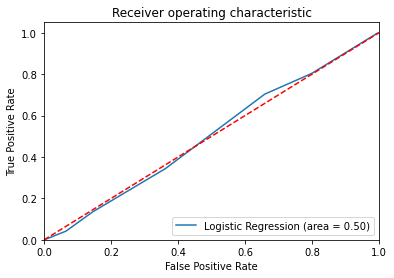

<IPython.core.display.Javascript object>

In [26]:
# Sklearn
logreg = LogisticRegression(fit_intercept=False, penalty="none")
logreg.fit(os_data_X_2, os_data_y.values.ravel())
y_pred = logreg.predict(X_test_2)
print("Accuracy score Logistic Regression:", logreg.score(X_test_2, y_test))
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_2))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_2)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [27]:
#Test set with labels
test_labels = pd.merge(
    y_test,
    X_test,
    how="inner",
    left_index=True,
    right_index=True,
)


<IPython.core.display.Javascript object>

In [28]:
# Predictions on testset
test_pred = logreg.predict_proba(X_test_2)[:, 1]
test_pred2 = pd.DataFrame(data=test_pred, columns=["prediction"])
test_pred2["count"] = test_pred2.groupby("prediction")["prediction"].transform("count")
test_pred2.groupby(["prediction"]).count()

,count
prediction,
0.121250,9
0.156644,17
0.249932,3
0.292376,862
0.292832,588
0.357407,1377
0.357912,959
0.499450,369
0.500000,268


<IPython.core.display.Javascript object>

In [29]:
# Join predictions with test new
pred_test_kgb = pd.DataFrame(
    data=test_pred, columns=["prediction_beforeRI"], index=y_test.index.copy()
)
pred_test1 = pd.merge(
    test_labels,
    pred_test_kgb[["prediction_beforeRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)

# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
pred_test1

,target,id,<=1k,>10k,Bad state,Good state,prediction_beforeRI
11341,0,26789777,0,1,0,0,0.499450
3076,1,17894572,0,1,0,0,0.499450
10395,0,34773392,0,1,0,0,0.499450
15834,0,1122926,0,1,0,1,0.292376
1317,0,46774382,0,1,1,0,0.357407
...,...,...,...,...,...,...,...
10236,0,98857570,0,1,0,1,0.292376
6184,1,94467429,0,1,1,0,0.357407
13619,1,124747082,0,1,1,0,0.357407
4441,1,49673413,0,1,1,0,0.357407


<IPython.core.display.Javascript object>

In [30]:
pred_test1.shape  # Expected nr. of observations

(4452, 7)

<IPython.core.display.Javascript object>

## Apply the KGB Model (Logistic Regression) to the Rejects

In [31]:
# Sampling
rejected_small = rejected.sample(n=25000, random_state=7)
rejected_small.reset_index(drop=True, inplace=True)
rejected_small.rename(columns={"Amount Requested": "loan_amnt"}, inplace=True)
rejected_small.rename(columns={"State": "addr_state"}, inplace=True)
dfr = rejected_small[["loan_amnt", "addr_state"]]

<IPython.core.display.Javascript object>

In [32]:
# Create unique id for the rejects (to facilitate merge later)
dfr["id"] = dfr.index.to_series().map(lambda x: uuid.uuid4())

<IPython.core.display.Javascript object>

In [33]:
# Train/Test Split (without labels)

# Shuffle the dataset
shuffle_df = dfr.sample(frac=1)

# Define a size for your train set
train_size = int(0.7 * len(shuffle_df))

# Split your dataset
dfr_dev = shuffle_df[:train_size]
dfr_test = shuffle_df[train_size:]

<IPython.core.display.Javascript object>

In [34]:
# Train Set
# Q&D Bucketing
dfr_dev["loan_amnt2"] = dfr_dev["loan_amnt"].apply(
    lambda x: "<=1k"
    if (x <= 1000)
    else ("1-10k" if (x > 1000 and x <= 10000) else ">10k")
)

dfr_dev["addr_state2"] = dfr_dev["addr_state"].apply(
    lambda x: "California"
    if (x == "CA")
    else ("Bad state" if (x in badstates) else "Good state")
)

<IPython.core.display.Javascript object>

In [35]:
# One hot encoding
modelling_variables = ["target", "loan_amnt2", "addr_state2"]

for i in modelling_variables:
    if i != "target":
        dfr_dev = dfr_dev.join(pd.get_dummies(dfr_dev[i]))
        dfr_dev = dfr_dev.drop([i], axis=1)

<IPython.core.display.Javascript object>

In [36]:
# Drop Null Band
dfr_dev2 = dfr_dev.drop(columns=["loan_amnt", "addr_state", "1-10k", "California"])

<IPython.core.display.Javascript object>

In [37]:
# Test Set
# Q&D Bucketing
dfr_test["loan_amnt2"] = dfr_test["loan_amnt"].apply(
    lambda x: "<=1k"
    if (x <= 1000)
    else ("1-10k" if (x > 1000 and x <= 10000) else ">10k")
)

dfr_test["addr_state2"] = dfr_test["addr_state"].apply(
    lambda x: "California"
    if (x == "CA")
    else ("Bad state" if (x in badstates) else "Good state")
)

<IPython.core.display.Javascript object>

In [38]:
# One hot encoding
modelling_variables = ["target", "loan_amnt2", "addr_state2"]

for i in modelling_variables:
    if i != "target":
        dfr_test = dfr_test.join(pd.get_dummies(dfr_test[i]))
        dfr_test = dfr_test.drop([i], axis=1)

<IPython.core.display.Javascript object>

In [39]:
# Drop Null Band
dfr_test2 = dfr_test.drop(columns=["loan_amnt", "addr_state", "1-10k", "California"])

<IPython.core.display.Javascript object>

In [40]:
dfr_dev3 = dfr_dev2[["<=1k", ">10k", "Bad state", "Good state"]]
dfr_test3 = dfr_test2[["<=1k", ">10k", "Bad state", "Good state"]]

<IPython.core.display.Javascript object>

In [41]:
# Predictions
rej_test_predictions = logreg.predict_proba(dfr_dev3)[:, 1]
df_pred_rej = pd.DataFrame(data=rej_test_predictions, columns=["prediction"])
df_pred_rej["Rejects"] = df_pred_rej.groupby("prediction")["prediction"].transform(
    "count"
)
df_pred_rej.groupby(["prediction"]).count()

,Rejects
prediction,
0.121250,679
0.156644,407
0.249932,128
0.292376,4007
0.292832,5395
0.357407,2173
0.357912,2833
0.499450,827
0.500000,1051


<IPython.core.display.Javascript object>

In [42]:
rej_test_predictions

array([0.35791247, 0.29237644, 0.35791247, ..., 0.29237644, 0.29237644,
       0.29283188])

<IPython.core.display.Javascript object>

### Reject Inference: Simple Augmentation

In [ ]:
#Reject Inference with cutoff 0.2
df_pred_rej["prediction2"] = df_pred_rej["prediction"].apply(
    lambda x: 0
    if (x < 0.3) else 1)
df_pred_rej2 = df_pred_rej["prediction2"]
ri1 = pd.DataFrame(data=df_pred_rej2, columns=["prediction2"])
ri1.rename(columns={"prediction2": "prediction"}, inplace=True)

In [ ]:
ri1

### K-Means

to-do:
- grid search/hypterparameter optimization
- visualization

In [46]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=7)

<IPython.core.display.Javascript object>

In [47]:
kmodel = kmeans.fit(dfr_dev3)

<IPython.core.display.Javascript object>

In [48]:
kmeans.inertia_

6794.4848412984475

<IPython.core.display.Javascript object>

In [49]:
kmeans.cluster_centers_

array([[ 7.21121445e-02,  4.04367165e-01, -1.07691633e-14,
         7.29613155e-01],
       [ 6.73544291e-02,  3.97480409e-01,  1.00000000e+00,
         5.27355937e-15]])

<IPython.core.display.Javascript object>

In [50]:
kmeans.n_iter_

2

<IPython.core.display.Javascript object>

In [51]:
kmeans.labels_

array([0, 1, 0, ..., 1, 1, 1])

<IPython.core.display.Javascript object>

### Reject Inference K-means

### Train set

In [52]:
# Predictions
rej_test_predictions_kmeans = kmeans.labels_
df_pred_rej_kmeans = pd.DataFrame(
    data=rej_test_predictions_kmeans, columns=["prediction"]
)
df_pred_rej_kmeans["Rejects"] = df_pred_rej_kmeans.groupby("prediction")[
    "prediction"
].transform("count")
df_pred_rej_kmeans.groupby(["prediction"]).count()

,Rejects
prediction,
0,7419
1,10081


<IPython.core.display.Javascript object>

In [53]:
# Join predictions with train new
pred_ri = kmeans.labels_
pred_ri2 = pd.DataFrame(
    data=pred_ri, columns=["prediction_beforeRI"], index=dfr_dev2.index.copy()
)
ri2 = pd.merge(
    dfr_dev2,
    pred_ri2[["prediction_beforeRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)
# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
ri2_train = ri2[["id", "prediction_beforeRI"]]
ri2_train

,id,prediction_beforeRI
17530,20e1fa68-fcfc-47fc-88c9-cb05be2d7b3f,0
13202,989753cc-cb7d-4e9b-a3e5-3764f42119e5,1
17046,1f6faa39-3755-4509-b31f-7911cc5149af,0
8805,7a4bad8c-c322-48ab-886d-63afe7947692,0
21792,9ca7f74a-ff6b-4ec2-b4d7-a85cd9631ee6,1
...,...,...
16405,652f1353-116d-4fa3-a153-f35c8f07d2c9,1
17868,248c406a-3777-42a2-ad3d-b25b6e7b268a,1
22971,a7d5fbcb-7e3d-44ea-9687-4d2e5128e08b,1
17791,df6b1826-6893-4ddd-a75f-4b534181c988,1


<IPython.core.display.Javascript object>

### Test Set

In [54]:
# Predictions
rej_test_predictions_kmeans2 = kmeans.predict(dfr_test3)
df_pred_rej_kmeans2 = pd.DataFrame(
    data=rej_test_predictions_kmeans2,
    columns=["prediction"],
    index=dfr_test2.index.copy(),
)
df_pred_rej_kmeans2["Rejects"] = df_pred_rej_kmeans2.groupby("prediction")[
    "prediction"
].transform("count")
df_pred_rej_kmeans2.groupby(["prediction"]).count()

,Rejects
prediction,
0,3180
1,4320


<IPython.core.display.Javascript object>

In [55]:
# Join predictions with test new
pred_test_ri = kmeans.predict(dfr_test3)
pred_test_ri2 = pd.DataFrame(
    data=pred_test_ri, columns=["prediction_beforeRI"], index=dfr_test2.index.copy()
)
ri2_testing = pd.merge(
    dfr_test2,
    pred_test_ri2[["prediction_beforeRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)
# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
ri2_test = ri2_testing[["id", "prediction_beforeRI"]]
ri2_test

,id,prediction_beforeRI
4253,e240d450-c77c-433a-b108-31fdc8efb1a5,1
912,88efb021-2ea8-4e83-8158-0e4e51e9cc2c,0
15431,249408d8-1a37-496e-b641-0d61c5087896,0
4030,7b92dd55-1326-46d0-ad85-dc3d8e59413f,0
6745,758e66a1-51bb-4eb0-81fd-3b5b322447fc,1
...,...,...
10115,3334d4f1-cdd4-4e39-a399-25e7cc4773f2,1
19753,45ce3907-426d-493e-b6e8-e548626ca611,0
17477,89e11be9-0f88-4d6b-9f92-231ecc7a5223,1
10154,31b03253-255e-46d4-94a4-082980c4f04d,0


<IPython.core.display.Javascript object>

### Hierarchical Clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
cluster.fit_predict(dfr_dev2)

TypeError: float() argument must be a string or a number, not 'UUID'

<IPython.core.display.Javascript object>

In [ ]:
# Predictions
rej_test_predictions_aggl = cluster.labels_
df_pred_rej_aggl = pd.DataFrame(
    data=rej_test_predictions_aggl, columns=["prediction"]
)
df_pred_rej_kmeans["Rejects"] = df_pred_rej_aggl.groupby("prediction")[
    "prediction"
].transform("count")

### Reject Inference Hierarchical Clustering

In [ ]:
ri3 = pd.DataFrame(data=df_pred_rej_kmeans, columns=["prediction"])
ri3

### Join all RI Predictions together

In [ ]:
merged = ri1.join(ri2, on=None, lsuffix='_RI1_Augmen', rsuffix='_RI2_KMeans',)
merged2 = merged.join(ri3, on=None)
merged2.rename(columns={"prediction": "prediction_RI3_Agglom"}, inplace=True)

### Evaluation Measures (with R2 for now)

#### Prepare Train New

In [57]:
# Join labels to train set
# Accepts
train_accepts = pd.merge(
    os_data_X, os_data_y[["target"]], how="left", left_index=True, right_index=True
)

train_accepts["Flag1"] = "Accept"

# Rejects
train_rejects = pd.merge(
    dfr_dev2,
    ri2_train[["prediction_beforeRI"]],
    how="left",
    left_index=True,
    right_index=True,
)

# Drop Null values and align naming
train_accepts.dropna(subset=["target"], inplace=True)
train_rejects.rename(columns={"prediction_beforeRI": "target"}, inplace=True)

<IPython.core.display.Javascript object>

In [58]:
# Concatenate Train Accepts and Train Rejects
train_new = pd.concat([train_accepts, train_rejects])

<IPython.core.display.Javascript object>

In [59]:
train_new.shape  # As expected

(23857, 7)

<IPython.core.display.Javascript object>

In [60]:
# Flag
train_new["Flag"] = train_new["Flag1"].apply(
    lambda x: "Accept" if x == "Accept" else "Reject"
)
train_new = train_new.drop(columns=["Flag1"])

<IPython.core.display.Javascript object>

In [61]:
# Retrain KGB Model

# Split
X_new = train_new.loc[:, train_new.columns != "target"]
X_new = X_new.loc[:, X_new.columns != "Flag"]
y_new = train_new.loc[:, train_new.columns == "target"]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.3, random_state=7
)

# Keep only columns for modelling
os_data_X_2_new = X_train_new[["<=1k", ">10k", "Good state", "Bad state"]]
X_test_2_new = X_test_new[["<=1k", ">10k", "Good state", "Bad state"]]

# Build Logistic regression
logreg = LogisticRegression(fit_intercept=False, penalty="none")
logreg.fit(os_data_X_2_new, y_train_new.values.ravel())

LogisticRegression(fit_intercept=False, penalty='none')

<IPython.core.display.Javascript object>

#### Prepare Test New

In [132]:
# Join labels to test set
# Accepts
test_accepts = pd.merge(
    X_test, y_test[["target"]], how="left", left_index=True, right_index=True
)

test_accepts["Flag1"] = "Accept"

# Rejects
test_rejects = pd.merge(
    dfr_test2,
    ri2_test[["prediction_beforeRI"]],
    how="left",
    left_index=True,
    right_index=True,
)

# Drop Null values and align naming
test_accepts.dropna(subset=["target"], inplace=True)
test_rejects.rename(columns={"prediction_beforeRI": "target"}, inplace=True)
test_rejects.dropna(subset=["target"], inplace=True)

<IPython.core.display.Javascript object>

In [133]:
# Concatenate Train Accepts and Train Rejects
test_new = pd.concat([test_accepts, test_rejects])

<IPython.core.display.Javascript object>

In [134]:
# Flag
test_new["Flag"] = test_new["Flag1"].apply(
    lambda x: "Accept" if x == "Accept" else "Reject"
)
test_new = test_new.drop(columns=["Flag1"])

<IPython.core.display.Javascript object>

In [135]:
test_new.shape  # As expected

(11952, 7)

<IPython.core.display.Javascript object>

In [138]:
test_new = test_new.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [139]:
X_test_new = test_new.loc[:, train_new.columns != "target"]
X_test_new2 = X_test_new.loc[:, X_test_new.columns != "Flag"]
X_test_new3 = X_test_new2.loc[:, X_test_new2.columns != "id"]
y_test_new = test_new.loc[:, train_new.columns == "target"]

<IPython.core.display.Javascript object>

#### Predictions

In [141]:
# Join predictions with test new
test_new_pred = logreg.predict_proba(X_test_new3)[:, 1]
pred_test_df = pd.DataFrame(
    data=test_new_pred, columns=["prediction_afterRI"], index=test_new.index.copy()
)
pred_test = pd.merge(
    test_new,
    pred_test_df[["prediction_afterRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)
# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
pred_test

,id,<=1k,>10k,Bad state,Good state,target,Flag,prediction_afterRI
0,26789777,0,1,0,0,0,Accept,0.328758
1,17894572,0,1,0,0,1,Accept,0.328758
2,34773392,0,1,0,0,0,Accept,0.328758
3,1122926,0,1,0,1,0,Accept,0.784677
4,46774382,0,1,1,0,0,Accept,0.054403
...,...,...,...,...,...,...,...,...
11947,3334d4f1-cdd4-4e39-a399-25e7cc4773f2,0,0,1,0,1,Reject,0.105119
11948,45ce3907-426d-493e-b6e8-e548626ca611,0,1,0,1,0,Reject,0.784677
11949,89e11be9-0f88-4d6b-9f92-231ecc7a5223,0,0,1,0,1,Reject,0.105119
11950,31b03253-255e-46d4-94a4-082980c4f04d,0,0,0,1,0,Reject,0.881523


<IPython.core.display.Javascript object>

In [142]:
a1 = pred_test1[["id", "target", "prediction_beforeRI"]]
a2 = pred_test[["id", "Flag", "prediction_afterRI"]]

<IPython.core.display.Javascript object>

In [143]:
# Join (outer to get full sample)
a1_a2_outer = pd.merge(a1, a2, how="outer", on="id")
# Join (inner to get only accepts and be able to compare)
a1_a2_inner = pd.merge(a1, a2, how="inner", on="id")
a1_a2_inner

,id,target,prediction_beforeRI,Flag,prediction_afterRI
0,26789777,0,0.499450,Accept,0.328758
1,17894572,1,0.499450,Accept,0.328758
2,34773392,0,0.499450,Accept,0.328758
3,1122926,0,0.292376,Accept,0.784677
4,46774382,0,0.357407,Accept,0.054403
...,...,...,...,...,...
4447,98857570,0,0.292376,Accept,0.784677
4448,94467429,1,0.357407,Accept,0.054403
4449,124747082,1,0.357407,Accept,0.054403
4450,49673413,1,0.357407,Accept,0.054403


<IPython.core.display.Javascript object>

In [150]:
# Make binary predictions based on cutoff 0.3
a1_a2_inner["prediction_beforeRI_binary"] = a1_a2_inner["prediction_beforeRI"].apply(
    lambda x: 0 if (x < 0.3) else 1
)
a1_a2_inner["prediction_afterRI_binary"] = a1_a2_inner["prediction_afterRI"].apply(
    lambda x: 0 if (x < 0.3) else 1
)

<IPython.core.display.Javascript object>

In [151]:
a1_a2_inner

,id,target,prediction_beforeRI,Flag,prediction_afterRI,prediction_beforeRI_binary,prediction_afterRI_binary
0,26789777,0,0.499450,Accept,0.328758,1,1
1,17894572,1,0.499450,Accept,0.328758,1,1
2,34773392,0,0.499450,Accept,0.328758,1,1
3,1122926,0,0.292376,Accept,0.784677,0,1
4,46774382,0,0.357407,Accept,0.054403,1,0
...,...,...,...,...,...,...,...
4447,98857570,0,0.292376,Accept,0.784677,0,1
4448,94467429,1,0.357407,Accept,0.054403,1,0
4449,124747082,1,0.357407,Accept,0.054403,1,0
4450,49673413,1,0.357407,Accept,0.054403,1,0


<IPython.core.display.Javascript object>

### Counts

In [173]:
print(
    "The number of accurately classified cases before RI is: ",
    a1_a2_inner[
        (a1_a2_inner.target == 1) & (a1_a2_inner.prediction_beforeRI_binary == 1)
        | (a1_a2_inner.target == 0) & (a1_a2_inner.prediction_beforeRI_binary == 0)
    ].shape[0],
)


print(
    "The number of misclassified cases before RI is: ",
    a1_a2_inner[
        (a1_a2_inner.target == 1) & (a1_a2_inner.prediction_beforeRI_binary == 0)
        | (a1_a2_inner.target == 0) & (a1_a2_inner.prediction_beforeRI_binary == 1)
    ].shape[0],
)

The number of accurately classified cases before RI is:  1849
The number of misclassified cases before RI is:  2603


<IPython.core.display.Javascript object>

In [174]:
print(
    "The number of accurately classified cases after RI is: ",
    a1_a2_inner[
        (a1_a2_inner.target == 1) & (a1_a2_inner.prediction_afterRI_binary == 1)
        | (a1_a2_inner.target == 0) & (a1_a2_inner.prediction_afterRI_binary == 0)
    ].shape[0],
)


print(
    "The number of misclassified cases after RI is: ",
    a1_a2_inner[
        (a1_a2_inner.target == 1) & (a1_a2_inner.prediction_afterRI_binary == 0)
        | (a1_a2_inner.target == 0) & (a1_a2_inner.prediction_afterRI_binary == 1)
    ].shape[0],
)

The number of accurately classified cases after RI is:  2227
The number of misclassified cases after RI is:  2225


<IPython.core.display.Javascript object>

### OPTICS

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
clustering = OPTICS(min_samples=2).fit(dfr3)
clustering.labels_

In [ ]:
clustering_optics

In [ ]:
# Predictions
clustering_optics = clustering.labels_
clustering_optics = pd.DataFrame(
    data=clustering_optics, columns=["prediction"]
)
clustering_optics["Rejects"] = clustering_optics.groupby("prediction")[
    "prediction"
].transform("count")
clustering_optics.groupby(["prediction"]).count()

### MeanShift

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
clustering2 = MeanShift(bandwidth=2).fit(dfr3)
clustering2.labels_

In [ ]:
# Predictions
clustering_meanshift = clustering2.labels_
clustering_meanshift = pd.DataFrame(
    data=clustering_meanshift, columns=["prediction"]
)
clustering_optics["Rejects"] = clustering_meanshift.groupby("prediction")[
    "prediction"
].transform("count")
clustering_meanshift.groupby(["prediction"]).count()

### SVM

In [ ]:
# Accepts
clf = SVC(gamma="auto", kernel="linear")
clf.fit(os_data_X_2, os_data_y.values.ravel())
pred = clf.predict(X_test_2)

In [ ]:
# Predictions
rej_test_predictions_kmeans = clf.predict(dfr3)
df_pred_rej_kmeans = pd.DataFrame(
    data=rej_test_predictions_kmeans, columns=["prediction"]
)
df_pred_rej_kmeans["Rejects"] = df_pred_rej_kmeans.groupby("prediction")[
    "prediction"
].transform("count")
df_pred_rej_kmeans.groupby(["prediction"]).count()